# Contents
## 1. Import libraries and data
## 2. Data Checks
## 3. Task
    3.1 Create overview of key customer variables
    3.2. Assign categories to different variables in order to create customer profile
    a. Age range
    b. Income range
    c. Babies flag
    3.3. Create customer profiles
    3.4. Customer profile analysis
    3.5. Department analysis
## 4. Export files and visualisations

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

In [2]:
# Naming Path for file retrieval 
path = r'C:\Users\ruthf\OneDrive\Documents\Data Immersion\Achievement 4\07-2022 Instacart Basket Analysis'

In [3]:
# Import full data pkl
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_instacart_data_ex_low_activity_customers.pkl'))

## 2. Data Checks

In [4]:
df.shape

(30964564, 30)

In [5]:
df.head()

order_id user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329       1             1                  2                  8   
1   2398795       1             2                  3                  7   
2    473747       1             3                  3                 12   
3   2254736       1             4                  4                  7   
4    431534       1             5                  4                 15   

   days_since_previous_order  product_id  add_to_cart_order  reordered  \
0                        NaN         196                  1          0   
1                       15.0         196                  1          1   
2                       21.0         196                  1          1   
3                       29.0         196                  1          1   
4                       28.0         196                  1          1   

  product_name  ...  gender    state  age date_joined no_of_dependants  \
0         Soda  ...  Female  Alabama   31   2/17/2019                3   
1         Soda  ...  Female  Alabama   31   2/17/2019                3   
2         Soda  ...  Female  Alabama   31   2/17/2019                3   
3         Soda  ...  Female  Alabama   31   2/17/2019                3   
4         Soda  ...  Female  Alabama   31   2/17/2019                3   

   marital_status  income  region  department activity_flag  
0         married   40423   South   beverages             0  
1         married   40423   South   beverages             0  
2         married   40423   South   beverages             0  
3         married   40423   South   beverages             0  
4         married   40423   South   beverages             0  

[5 rows x 30 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404855
Data columns (total 30 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   order_id                          int64  
 1   user_id                           object 
 2   order_number                      int8   
 3   order_day_of_week                 int8   
 4   order_hour_of_day                 int8   
 5   days_since_previous_order         float32
 6   product_id                        int32  
 7   add_to_cart_order                 int8   
 8   reordered                         int8   
 9   product_name                      object 
 10  department_id                     int8   
 11  prices                            float32
 12  price_range                       int8   
 13  busiest_day                       object 
 14  busiest_period_of_day             object 
 15  max_order                         int8   
 16  loyalty_flag                      

## 3. Task

5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## 3.1. Create overview of key customer variables.

In [7]:
# Creating overview of key customer variables
customer_p = df.groupby('marital_status').agg({'user_id':'nunique','income':'mean',
                                                'no_of_dependants':'mean','age':'mean','order_id':'nunique',
                                               'prices':'sum','max_order':'mean', 
                                               'median_days_since_previous_order':'median'}).sort_values(by = 'user_id', ascending = False)

In [8]:
# Formatting numbers to more readable format
customer_p['prices'] = customer_p['prices'].map('{:,.2f}'.format)

In [9]:
# Formatting numbers to be more readable
#df['DataFrame column'].round(decimals = number of decimal places needed)
customer_p['age'] = customer_p['age'].round(0)
customer_p['max_order'] = customer_p['max_order'].round(0)
customer_p['no_of_dependants'] = customer_p['no_of_dependants'].round(1)

In [10]:
customer_p.rename(columns = {'income':'mean_income', 'age':'mean_age', 'order_id': 'no_of_orders','prices':'total_spend'})

user_id    mean_income  no_of_dependants  \
marital_status                                                               
married                            114296  101559.437850               2.0   
single                              26896   91550.918195               0.0   
divorced/widowed                    13831  115969.768975               0.0   
living with parents and siblings     7608   70870.404339               2.0   

                                  mean_age  no_of_orders     total_spend  \
marital_status                                                             
married                               51.0       2151244  169,362,208.00   
single                                39.0        506425   39,647,128.00   
divorced/widowed                      71.0        261329   20,632,364.00   
living with parents and siblings      20.0        145377   11,552,531.00   

                                  max_order  median_days_since_previous_order  
marital_status                                                                 
married                                34.0                               7.0  
single                                 35.0                               7.0  
divorced/widowed                       35.0                               7.0  
living with parents and siblings       35.0                               7.0

## 3.2. Look at different variables to assign categories to in order to create customer profile.  Age, income and babies.

## a. Age range

In [11]:
df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

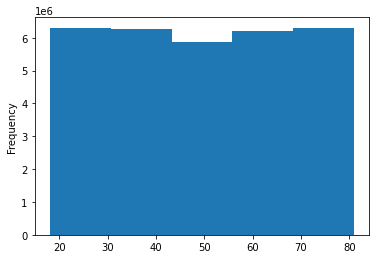

In [12]:
df['age'].plot.hist(bins=5)

## Put customers into age range
* 1 = 18-24
* 2 = 25-35
* 3 = 36-50
* 4 = 51-64
* 5 = 65+

In [13]:
# creating age range variable

df.loc[(df['age']>=18) & (df['age']<25),'age_range'] = 1
df.loc[(df['age']>=25) & (df['age']<=35),'age_range'] = 2
df.loc[(df['age']>35) & (df['age']<=50),'age_range'] = 3
df.loc[(df['age']>50) & (df['age']<65),'age_range'] = 4
df.loc[df['age']>=65,'age_range'] = 5


In [14]:
df['age_range'].value_counts(dropna=False)

5.0    8195544
3.0    7278260
4.0    6751955
2.0    5323611
1.0    3415194
Name: age_range, dtype: int64

In [15]:
# Changing data type to reduce storage
df['age_range'] = df['age_range'].astype('int8')

In [16]:
df['age_range'].value_counts()

5    8195544
3    7278260
4    6751955
2    5323611
1    3415194
Name: age_range, dtype: int64

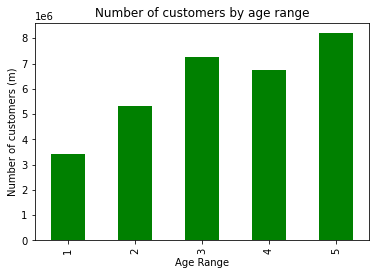

In [17]:
bar_age = df['age_range'].value_counts().sort_index().plot.bar(color = 'green',
                                                              title = 'Number of customers by age range',
                                                              xlabel = 'Age Range',
                                                              ylabel = 'Number of customers (m)')

<AxesSubplot:title={'center':'Number of customers by age range'}, ylabel='user_id'>

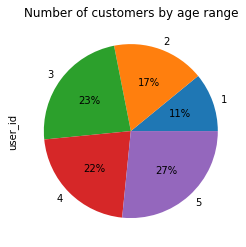

In [18]:
# Create pie chart of age range
customer_age = df.groupby('age_range')['user_id'].nunique()
customer_age.plot.pie(autopct='%1.0f%%', title = 'Number of customers by age range')

## b. Income range

In [19]:
df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

## Putting customers into income brackets based on US income classifications (low income to rich).
* 1 = 32,048 or less
* 2 = 32,048 - 53,413
* 3 = 53,413 - 106,827
* 4 = 106,827 - 373,894
* 5 = 373,894 or higher
#### https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system Source for US income classes.

In [21]:
# Creating income flag based on US income classifications
df.loc[df['income']<32408, 'income_range'] = 1
df.loc[(df['income']>=32408) & (df['income']<53413), 'income_range'] = 2
df.loc[(df['income']>=53413) & (df['income']<106827), 'income_range'] = 3
df.loc[(df['income']>=106827) & (df['income']<373894), 'income_range'] = 4
df.loc[df['income']>=373894, 'income_range'] = 5

In [22]:
df['income_range'].value_counts(dropna=False)

3.0    14599429
4.0    12284192
2.0     3483505
1.0      539384
5.0       58054
Name: income_range, dtype: int64

In [23]:
# Changing data type to reduce storage
df['income_range'] = df['income_range'].astype('int8')

In [24]:
df.head()

order_id user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329       1             1                  2                  8   
1   2398795       1             2                  3                  7   
2    473747       1             3                  3                 12   
3   2254736       1             4                  4                  7   
4    431534       1             5                  4                 15   

   days_since_previous_order  product_id  add_to_cart_order  reordered  \
0                        NaN         196                  1          0   
1                       15.0         196                  1          1   
2                       21.0         196                  1          1   
3                       29.0         196                  1          1   
4                       28.0         196                  1          1   

  product_name  ...  age  date_joined  no_of_dependants marital_status income  \
0         Soda  ...   31    2/17/2019                 3        married  40423   
1         Soda  ...   31    2/17/2019                 3        married  40423   
2         Soda  ...   31    2/17/2019                 3        married  40423   
3         Soda  ...   31    2/17/2019                 3        married  40423   
4         Soda  ...   31    2/17/2019                 3        married  40423   

   region  department  activity_flag  age_range income_range  
0   South   beverages              0          2            2  
1   South   beverages              0          2            2  
2   South   beverages              0          2            2  
3   South   beverages              0          2            2  
4   South   beverages              0          2            2  

[5 rows x 32 columns]

In [25]:
df['income_range'].value_counts()

3    14599429
4    12284192
2     3483505
1      539384
5       58054
Name: income_range, dtype: int64

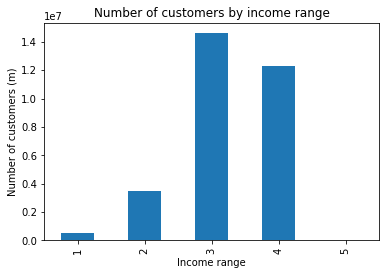

In [26]:
bar_income = df['income_range'].value_counts().sort_index().plot.bar(title = 'Number of customers by income range',
                                                                    xlabel = 'Income range',
                                                                    ylabel = 'Number of customers (m)')

<AxesSubplot:title={'center':'Number of customers by income range'}, ylabel='user_id'>

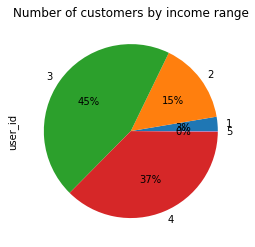

In [27]:
# Create pie chart of income range
customer_income = df.groupby('income_range')['user_id'].nunique()
customer_income.plot.pie(autopct='%1.0f%%', title = 'Number of customers by income range')

### The majority of our customers fall into brackets 3 and 4 (53,413 to 373,894 USD) these are classed as middle and upper middle class. 

## 3.3. Create customer profiles.

## Create customer profiles based on age, income, marital status and number of dependants. 
    1. Single adult (young) 
    2. Single adult (older) 
    3. Young family 
    4. Older family  
    5. Young parent (not married).

### All profiles contained customers within each income bracket.  

In [28]:
# df.loc[(df['Salary_in_1000']>=100) & (df['Age']< 60) & (df['FT_Team'].str.startswith('S')),['Name','FT_Team']]

# Single adult (young)
df.loc[(df['age_range']<=2) & (df['marital_status']=='single'), 'customer_profile'] = 'single adult young'

In [29]:
# married without kids
df.loc[(df['marital_status']=='married') & (df['no_of_dependants']==0), 'customer_profile'] = 'couple nk'
# no results for this criteria

In [30]:
# young family
df.loc[(df['age_range']<=2) & (df['marital_status']=='married') & (df['no_of_dependants']>0), 
       'customer_profile'] = 'young family'

In [31]:
# older family
df.loc[(df['age_range']>2) & (df['marital_status']=='married') & (df['no_of_dependants']>0), 
       'customer_profile'] = 'older family'

In [32]:
# young parent
df.loc[(df['age_range']<=2) & (df['marital_status']!='married') & (df['no_of_dependants']>0), 
       'customer_profile'] = 'young parent'

In [33]:
# Single adult (older)
df.loc[(df['age_range']>2) & (df['marital_status']!='married'), 'customer_profile'] = 'single adult older'

In [34]:
# Create df of key kpis by customer profile
customer_profile = df.groupby(['customer_profile']).agg({'prices':'sum','user_id':'nunique', 
                                                       'order_id':'nunique', 'product_id':'count',
                                                       'days_since_previous_order':'mean'})

In [35]:
# Renaming columns to be more readable
customer_profile = customer_profile.rename(columns = {'prices':'total_spend', 'user_id':'customer_count',
                                                      'order_id':'order_count','product_id':'product_count',
                                   'days_since_previous_order':'order_frequency'}).sort_values(by = 'total_spend',
                                                                                                    ascending = False)

In [36]:
# Calculate average spend per order, average spend per customer, average number of orders by customer, 
# average number of products per order

In [37]:
customer_profile['average_order_value'] = customer_profile['total_spend']/customer_profile['order_count']
customer_profile['average_customer_spend'] = customer_profile['total_spend']/customer_profile['customer_count']
customer_profile['average_orders_by_customer'] = customer_profile['order_count']/customer_profile['customer_count']
customer_profile['products_per_order'] = customer_profile['product_count']/customer_profile['order_count']

In [38]:
customer_profile

total_spend  customer_count  order_count  product_count  \
customer_profile                                                              
older family        129841400.0           87743      1652901       16663768   
single adult older   43338796.0           29199       552915        5561991   
young family         39520812.0           26553       498343        5079943   
single adult young   16940698.0           11528       214839        2177690   
young parent         11552531.0            7608       145377        1481172   

                    order_frequency  average_order_value  \
customer_profile                                           
older family              10.820507            78.553646   
single adult older        10.750344            78.382384   
young family              10.822084            79.304439   
single adult young        10.898283            78.852992   
young parent              10.750995            79.466016   

                    average_customer_spend  average_orders_by_customer  \
customer_profile                                                         
older family                   1479.792120                   18.837981   
single adult older             1484.256173                   18.936094   
young family                   1488.374647                   18.767861   
single adult young             1469.526197                   18.636277   
young parent                   1518.471477                   19.108438   

                    products_per_order  
customer_profile                        
older family                 10.081528  
single adult older           10.059396  
young family                 10.193668  
single adult young           10.136381  
young parent                 10.188489

In [39]:
# Formatting numbers to more readable format
customer_profile['total_spend'] = customer_profile['total_spend'].map('{:,.2f}'.format)
customer_profile['order_frequency'] = customer_profile['order_frequency'].round(2)
customer_profile['average_order_value'] = customer_profile['average_order_value'].round(2)
customer_profile['average_customer_spend'] = customer_profile['average_customer_spend'].round(2)
customer_profile['average_orders_by_customer'] = customer_profile['average_orders_by_customer'].round(2)
customer_profile['products_per_order'] = customer_profile['products_per_order'].round(2)


## 3.4. Customer profile analysis

In [40]:
customer_profile

total_spend  customer_count  order_count  \
customer_profile                                                  
older family        129,841,400.00           87743      1652901   
single adult older   43,338,796.00           29199       552915   
young family         39,520,812.00           26553       498343   
single adult young   16,940,698.00           11528       214839   
young parent         11,552,531.00            7608       145377   

                    product_count  order_frequency  average_order_value  \
customer_profile                                                          
older family             16663768            10.82                78.55   
single adult older        5561991            10.75                78.38   
young family              5079943            10.82                79.30   
single adult young        2177690            10.90                78.85   
young parent              1481172            10.75                79.47   

                    average_customer_spend  average_orders_by_customer  \
customer_profile                                                         
older family                       1479.79                       18.84   
single adult older                 1484.26                       18.94   
young family                       1488.37                       18.77   
single adult young                 1469.53                       18.64   
young parent                       1518.47                       19.11   

                    products_per_order  
customer_profile                        
older family                     10.08  
single adult older               10.06  
young family                     10.19  
single adult young               10.14  
young parent                     10.19

In [41]:
customer_profile.to_clipboard()

6. Create an appropriate visualization to show the distribution of profiles.

In [42]:
df['customer_profile'].value_counts()

older family          16663768
single adult older     5561991
young family           5079943
single adult young     2177690
young parent           1481172
Name: customer_profile, dtype: int64

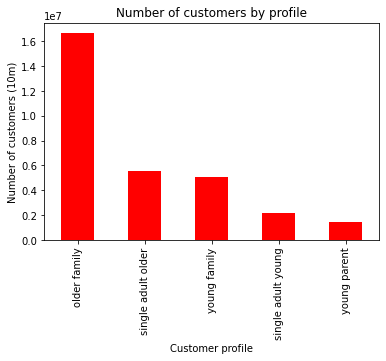

In [43]:
# Create bar chart
bar_customer = df['customer_profile'].value_counts().plot.bar(color = 'red',
                                                             title = 'Number of customers by profile',
                                                             xlabel = 'Customer profile',
                                                             ylabel = 'Number of customers (10m)')

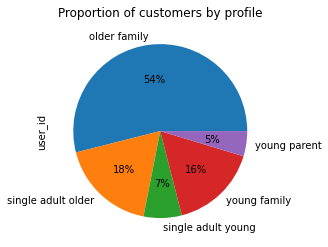

In [44]:
# Creating pie chart on proportion of customers by customer profile
cust1 = df.groupby('customer_profile')['user_id'].nunique()
pie_customer_profile = cust1.plot.pie(autopct='%1.0f%%', title = 'Proportion of customers by profile')

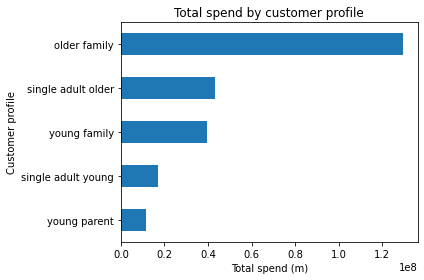

In [45]:
# Creating bar chart on total spend by customer profile
cust2 = df.groupby('customer_profile')['prices'].sum().sort_values(ascending = True)
bar_customer_spend = cust2.plot.barh(title = 'Total spend by customer profile')
plt.xlabel('Total spend (m)')
plt.ylabel('Customer profile')
plt.tight_layout()

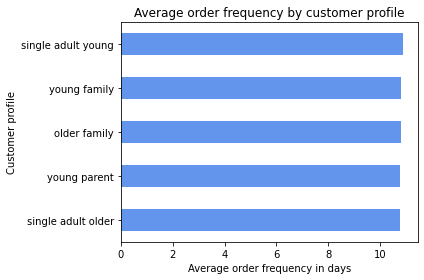

In [49]:
# Creating bar chart on average order frequency 
cust3 = df.groupby('customer_profile')['days_since_previous_order'].mean().sort_values(ascending = True)
bar_order_frequency_cp = cust3.plot.barh(title = 'Average order frequency by customer profile',
              color ='CornflowerBlue' ,)
plt.xlabel('Average order frequency in days')
plt.ylabel('Customer profile')
plt.tight_layout()

In [51]:
# Creating cross tab on region and customer profile.  This is automatically based on frequency so equates to products bought.
# pd.crosstab(df['state'], df['course']).sum()
crosstab_region = pd.crosstab(df['customer_profile'], df['region'])

In [52]:
crosstab_region

region              Midwest  Northeast    South     West
customer_profile                                        
older family        3911840    2956132  5522691  4273105
single adult older  1331262     957079  1838037  1435613
single adult young   491554     397403   743896   544837
young family        1175422     897641  1701058  1305822
young parent         351435     256430   505457   367850

In [53]:
crosstab_region.to_clipboard()

In [54]:
# Viewing as percentage as easier to read.
# pd.crosstab(customers['loyalty_flag'], customers['region']).apply(lambda r: round(r/r.sum()*100,2), axis=0)
crosstab_regionp = pd.crosstab(df['customer_profile'], df['region']).apply(lambda r: round(r/r.sum()*100,2), axis=0)
print(crosstab_regionp)

region              Midwest  Northeast  South   West
customer_profile                                    
older family          53.87      54.10  53.56  53.90
single adult older    18.33      17.51  17.83  18.11
single adult young     6.77       7.27   7.21   6.87
young family          16.19      16.43  16.50  16.47
young parent           4.84       4.69   4.90   4.64


In [66]:
crosstab_regionp.to_clipboard()

In [55]:
# Checking percentage on total row rather than column
crosstab_regionp_2 = pd.crosstab(df['customer_profile'], df['region']).apply(lambda r: round(r/r.sum()*100,2), axis=1)
print(crosstab_regionp_2)

region              Midwest  Northeast  South   West
customer_profile                                    
older family          23.48      17.74  33.14  25.64
single adult older    23.93      17.21  33.05  25.81
single adult young    22.57      18.25  34.16  25.02
young family          23.14      17.67  33.49  25.71
young parent          23.73      17.31  34.13  24.84


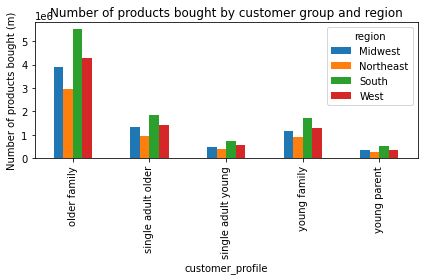

In [59]:
# Creating bar chart on number of products bought by customer group
bar_products = crosstab_region.plot.bar(title = 'Number of products bought by customer group and region',
                                       ylabel = 'Number of products bought (m)')
plt.tight_layout()

In [64]:
# Looking at order day of week by customer profile
crosstab_order_days = pd.crosstab(df['order_day_of_week'],df['customer_profile'])

In [65]:
crosstab_order_days

customer_profile   older family  single adult older  single adult young  \
order_day_of_week                                                         
0                       3172412             1065714              411364   
1                       2899169              965817              396533   
2                       2174471              723211              279370   
3                       1978300              660653              256389   
4                       1951055              646726              258533   
5                       2161837              734571              279603   
6                       2326524              765299              295898   

customer_profile   young family  young parent  
order_day_of_week                              
0                        978292        280828  
1                        890685        259482  
2                        655288        192366  
3                        599775        174418  
4                        595466        173214  
5                        662258        195460  
6                        698179        205404

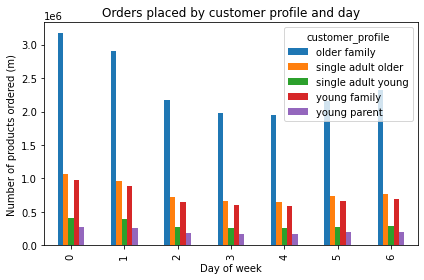

In [70]:
# Create bar chart on orders placed by day of the week for customer profile
bar_cp_order_day = crosstab_order_days.plot.bar(title = 'Orders placed by customer profile and day',
                            xlabel = 'Day of week',
                            ylabel = 'Number of products ordered (m)')
plt.tight_layout()

The majority of our customers fall into the older family profile.  They have also placed the most orders and have the highest expenditure.  However this doesn't seem to be driven by one particular factor as their KPI's are in line with other customer profiles.  Average order value, customer spend, average number of orders and number of products per order are all very similar across all profiles.

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [42]:
# Creating df aggregating min, max, mean of orders and expenditure
customer_stats = df.groupby('customer_profile').agg({'prices':['min','max','mean'],'max_order':['min','max','mean'],
                                    'days_since_previous_order':['min','max','mean']})

In [43]:
customer_stats

prices                 max_order                 \
                      min   max      mean       min max       mean   
customer_profile                                                     
older family          1.0  25.0  7.793064         5  99  34.321861   
single adult older    1.0  25.0  7.793148         5  99  34.845090   
single adult young    1.0  25.0  7.780360         5  99  34.243558   
young family          1.0  25.0  7.781142         5  99  34.260533   
young parent          1.0  25.0  7.800604         5  99  34.853070   

                   days_since_previous_order                   
                                         min   max       mean  
customer_profile                                               
older family                             0.0  30.0  10.820507  
single adult older                       0.0  30.0  10.750344  
single adult young                       0.0  30.0  10.898283  
young family                             0.0  30.0  10.822084  
young parent                             0.0  30.0  10.750995

Looking at modes of different variables such as department, region, price range and when orders are placed to see if there are any trends and differences between customer profiles.  Unfortunately no further insight was gleaned.

In [44]:
# source.groupby(['Country','City'])['Short name'].agg(pd.Series.mode)

df.groupby('customer_profile')['department'].agg(pd.Series.mode)

customer_profile
older family          produce
single adult older    produce
single adult young    produce
young family          produce
young parent          produce
Name: department, dtype: object

In [45]:
df.groupby('customer_profile')['region'].agg(pd.Series.mode)

customer_profile
older family          South
single adult older    South
single adult young    South
young family          South
young parent          South
Name: region, dtype: object

In [46]:
df.groupby('customer_profile')['price_range'].agg(pd.Series.mode)

customer_profile
older family          1
single adult older    1
single adult young    1
young family          1
young parent          1
Name: price_range, dtype: int8

In [47]:
df.groupby('customer_profile')['order_day_of_week'].agg(pd.Series.mode)

customer_profile
older family          0
single adult older    0
single adult young    0
young family          0
young parent          0
Name: order_day_of_week, dtype: int8

In [48]:
df.groupby('customer_profile')['order_hour_of_day'].agg(pd.Series.mode)

customer_profile
older family          10
single adult older    10
single adult young    11
young family          10
young parent          10
Name: order_hour_of_day, dtype: int8

In [ ]:
cust2 = df.groupby('')

## 3.5. Department analysis

In [117]:
# Creating df of department by revenue to see best selling departments

<<Shouldn't be nunique order_id values as can order multiple prods from the same dept in diff orders.

dept_prices = df.groupby(['department','department_id']).agg({'product_id':'nunique',
                              'prices':'sum', 'order_id':'nunique'}).sort_values(by= 'prices', ascending = False)

In [118]:
# Changing number format of prices
dept_prices['prices'] = dept_prices['prices'].map('{:,.2f}'.format)

In [119]:
dept_prices

product_id         prices  order_id
department      department_id                                     
produce         4                    1684  72,455,760.00   2303683
dairy eggs      16                   3442  43,118,260.00   2080172
beverages       7                    4360  19,758,774.00   1391504
frozen          1                    4005  16,408,884.00   1123774
pantry          13                   5364  14,287,456.00   1064676
snacks          19                   6260  11,827,920.00   1330617
meat seafood    12                    906  10,998,953.00    547289
bakery          3                    1515   8,806,886.00    839208
deli            20                   1320   7,813,188.00    735224
canned goods    15                   2091   7,637,778.50    647047
dry goods pasta 9                    1858   6,042,181.50    568596
breakfast       14                   1113   5,388,030.00    497368
household       17                   3082   5,164,910.50    447118
personal care   11                   6557   3,393,915.00    303066
babies          18                   1080   3,133,096.50    172101
international   6                    1139   1,965,702.88    210988
alcohol         5                    1051   1,178,811.12     79655
pets            8                     970     734,009.69     56367
missing         21                   1247     560,933.31     55779
bulk            10                     38     279,212.78     32698
other           2                     548     239,569.20     33246

In [124]:
df.shape

(30964564, 34)

In [125]:
customer_profile.shape

(5, 9)

## 4. Export files and visualisations

Exporting files to use to create visualisations and answer business questions in next notebook.

In [50]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_instacart_data_4.10.pkl'))

In [91]:
customer_profile.to_csv(os.path.join(path, '02 Data','Prepared Data', 'customer_profiles.csv'))

In [92]:
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_age_group.png'))

In [93]:
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_income.png'))

In [94]:
bar_customer.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_customer_group.png'))

In [95]:
pie_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_customer_group.png'))

In [48]:
bar_customer_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_customer_spend.png'))

In [60]:
bar_products.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_customer_products.png'))

In [50]:
bar_order_frequency_cp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_cp_order_freq.png'))

In [71]:
bar_cp_order_day.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_cp_order_freq.png'))